In [1]:
import sys, os

import pickle as pickle

import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages
from matplotlib import rc
from pylab import *

plt.rc("text", usetex=True)
plt.rc("font", family="serif")
plt.rc("text.latex", preamble=r"\usepackage{amsfonts}")

sys.path.append("../../../../lazydinos/utilities/")
from plotting import *

# from plotting import *

In [2]:
error_directory = "/storage/joshua/nonlinear_diffusion_reaction/problem/rel_noise_0.002_noise_stdev_0.0019357267998146984/training_metrics"

error_files = os.listdir(error_directory)

print(error_files[:5])

['cm_weighted_n_data_2000h1_1.0r10.pkl', 'cm_weighted_n_data_2000h1_0.0r10.pkl', 'cm_weighted_n_data_125h1_0.0r200.pkl', 'cm_weighted_n_data_500h1_0.0r200.pkl', 'cm_weighted_n_data_500h1_1.0r100.pkl']


In [3]:
def plot_label(file_name):
    if file_name.endswith(".pkl"):
        file_name = file_name.split(".pkl")[0]

    #     if 'kle'in file:
    #         basis = 'KLE'
    #         prefix, suffix = file_name.split('kle')
    #         rank = suffix.split('r')[-1]
    #     elif 'as' in file:
    #         basis = 'AS'
    #         prefix, suffix = file_name.split('as')
    #         rank = suffix.split('r')[-1]
    #     else:
    #         print(file_name)
    #         raise
    basis = "AS"
    rank = file_name.split("r")[-1]

    n_data = file_name.split("n_data_")[-1].split("h1")[0]

    h1_weight = float(file_name.split("h1_")[-1].split("r")[0])

    formulation = basis + " r=" + rank

    if h1_weight == 0:
        formulation += " L2"
    else:
        formulation += " DINO"

    return formulation + " " + n_data

In [ ]:
all_loggers = {}
for file in error_files:
    name = plot_label(file)
    print(name)
    try:
        all_loggers[name] = pickle.load(open(error_files + file, "rb"))
    except:
        print("Issue")
        pass

AS r=10 DINO 2000
AS r=10 L2 2000
AS r=200 L2 125
AS r=200 L2 500
AS r=100 DINO 500
AS r=100 DINO 125
AS r=100 L2 250
AS r=10 DINO 125
AS r=10 L2 125
AS r=50 L2 250
AS r=50 DINO 250
AS r=200 DINO 250
AS r=200 L2 2000
AS r=100 DINO 2000
AS r=25 L2 9500
AS r=25 L2 8000
AS r=25 DINO 8000
AS r=25 DINO 9500
AS r=50 DINO 1000
AS r=50 L2 1000
AS r=100 L2 8000
AS r=200 DINO 8000
AS r=25 DINO 250
AS r=25 L2 250
AS r=200 DINO 125
AS r=200 DINO 500
AS r=100 L2 500
AS r=100 L2 125
AS r=100 DINO 250
AS r=10 L2 4000
AS r=10 DINO 4000
AS r=200 L2 250
AS r=200 DINO 2000
AS r=100 L2 2000
AS r=25 L2 1000
AS r=25 DINO 1000
AS r=50 DINO 9500
AS r=50 DINO 8000
AS r=50 L2 8000
AS r=50 L2 9500
AS r=100 DINO 8000
AS r=10 DINO 500
AS r=10 L2 500
AS r=200 L2 8000
AS r=10 L2 250
AS r=10 DINO 250
AS r=200 DINO 9500
AS r=200 L2 4000
AS r=100 DINO 4000
AS r=100 L2 9500
AS r=50 DINO 125
AS r=50 L2 125
AS r=25 DINO 4000
AS r=25 L2 4000
AS r=50 L2 2000
AS r=10 DINO 1000
AS r=10 L2 1000
AS r=25 L2 500
AS r=25 DINO 500


In [5]:
for key in list(all_loggers.keys())[:1]:
    print(key)
    print(all_loggers[key])

# print(all_loggers)

AS r=10 DINO 2000
{'reduced': {'l2_train': 0.94594395, 'h1_train': 0.8493558, 'l2_test': 0.9449285, 'h1_test': 0.84864795}, 'full': {'l2_train': 0.94594395, 'h1_train': 0.40690848, 'l2_test': 0.9449285, 'h1_test': 0.4063408}}


In [6]:
def get_data(space="reduced", errors=True):
    all_networks = {}
    ndatas = []
    for key in all_loggers:
        ndata = key.split(" ")[-1]
        network = key.split(ndata)[0][:-1]
        ndatas.append(int(ndata))
        if network not in all_networks.keys():
            all_networks[network] = {}
    ndatas = set(ndatas)
    ndatas = [ndata for ndata in ndatas]
    ndatas = np.array(ndatas)
    ndatas = ndatas[np.argsort(ndatas)]

    metrics = ["l2_train", "h1_train", "l2_test", "h1_test"]

    print(list(all_networks.keys()))

    for network in all_networks.keys():
        for metric in metrics:
            all_networks[network][metric] = ndatas.copy(), np.zeros_like(ndatas, dtype=float)
    for network in all_networks.keys():
        try:
            for idx_ndata, ndata in enumerate(ndatas):
                specific_data = all_loggers[network + " " + str(ndata)][space]
                for key, item in specific_data.items():
                    if errors:
                        all_networks[network][key][1][idx_ndata] = (1.0 - item).copy()
                    else:
                        all_networks[network][key][1][idx_ndata] = (item).copy()
        except:
            pass

    l2_train = {}
    l2_test = {}
    h1_train = {}
    h1_test = {}

    for network in all_networks:
        l2_train[network] = all_networks[network]["l2_train"]
        l2_test[network] = all_networks[network]["l2_test"]
        h1_train[network] = all_networks[network]["h1_train"]
        h1_test[network] = all_networks[network]["h1_test"]

    return {
        "all_networks": all_networks,
        "l2_train": l2_train,
        "l2_test": l2_test,
        "h1_train": h1_train,
        "h1_test": h1_test,
    }


all_data = get_data()

all_networks = all_data["all_networks"]

color_dict = {}
for i, key in enumerate(all_networks):
    color_dict[key] = "C" + str(i)
my_markers = ["s", ".", "o", "*", "8", "p", "P", "h", "H", "+", "x", "X", "d", "D", "1", "2", "3", "4"]
marker_dict = {}
for i, key in enumerate(all_networks):
    marker_dict[key] = my_markers[i]

l2_train = all_data["l2_train"]
l2_test = all_data["l2_test"]
h1_train = all_data["h1_train"]
h1_test = all_data["h1_test"]

['AS r=10 DINO', 'AS r=10 L2', 'AS r=200 L2', 'AS r=100 DINO', 'AS r=100 L2', 'AS r=50 L2', 'AS r=50 DINO', 'AS r=200 DINO', 'AS r=25 L2', 'AS r=25 DINO']


In [7]:
l2_train.keys()

dict_keys(['AS r=10 DINO', 'AS r=10 L2', 'AS r=200 L2', 'AS r=100 DINO', 'AS r=100 L2', 'AS r=50 L2', 'AS r=50 DINO', 'AS r=200 DINO', 'AS r=25 L2', 'AS r=25 DINO'])

../../../../lazydinos/utilities/plotting.py:112: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  ax.set_ylim(bottom = ylim_bottom ,top = ylim_top)


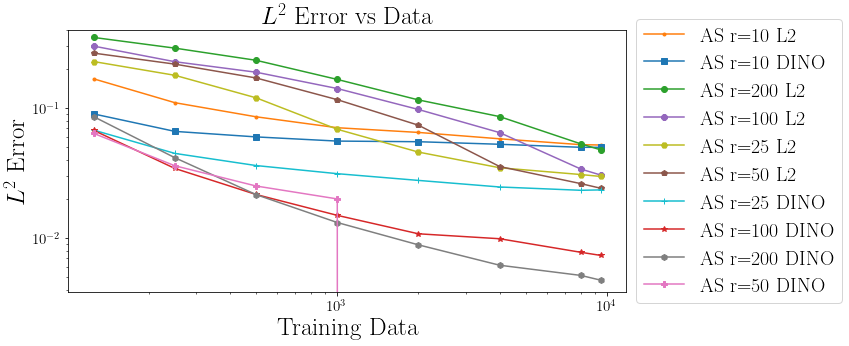

In [8]:
plot_error_vs_data(
    l2_test,
    full_ylim=True,
    ylim_bottom=0.0,
    ylim_top=0.4,
    legend_anchor_right=True,
    color_dict=color_dict,
    out_name="rdiff_AllL2",
    marker_dict=marker_dict,
    plot_type="loglog",
    axis_label=["Training Data", "$L^2$ Error", "$L^2$ Error vs Data"],
)

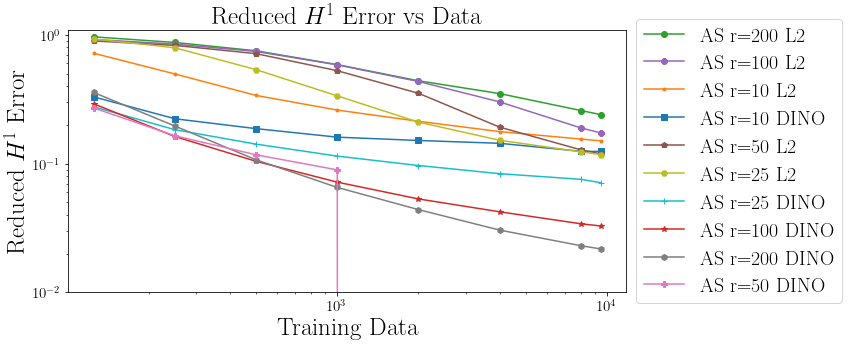

In [9]:
plot_error_vs_data(
    h1_test,
    full_ylim=True,
    ylim_bottom=0.01,
    ylim_top=1.1,
    plot_type="loglog",
    legend_anchor_right=True,
    color_dict=color_dict,
    out_name="rdiff_AllH1",
    marker_dict=marker_dict,
    axis_label=["Training Data", "Reduced $H^1$ Error", "Reduced $H^1$ Error vs Data"],
)

## Automate the plotting by changing the list of keys and out prefix

../../../../lazydinos/utilities/plotting.py:112: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  ax.set_ylim(bottom = ylim_bottom ,top = ylim_top)


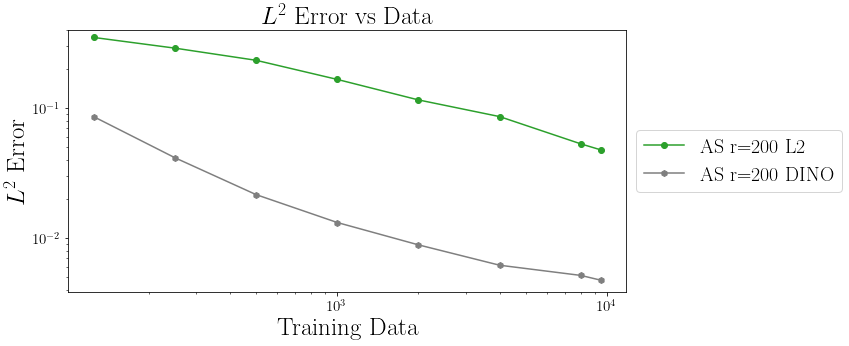

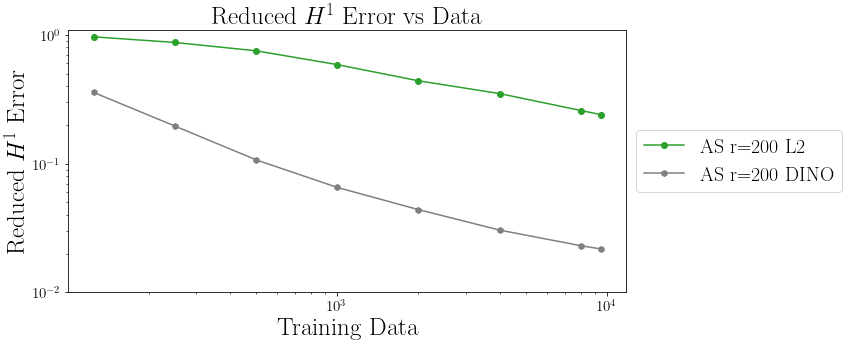

In [10]:
# Pick your keys
my_keys = ["AS r=200 L2", "AS r=200 DINO"]

out_name_prefix = "rdiff_asr200"

# Change all the above to your liking!! ^^^^

my_l2_data = {}
my_h1_data = {}
for my_key in my_keys:
    my_l2_data[my_key] = l2_test[my_key]
    my_h1_data[my_key] = h1_test[my_key]

# L2 Plot!

plot_error_vs_data(
    my_l2_data,
    full_ylim=True,
    ylim_bottom=0.0,
    ylim_top=0.4,
    legend_anchor_right=True,
    color_dict=color_dict,
    out_name=out_name_prefix + "L2",
    marker_dict=marker_dict,
    plot_type="loglog",
    axis_label=["Training Data", "$L^2$ Error", "$L^2$ Error vs Data"],
)

# H1 Plot

plot_error_vs_data(
    my_h1_data,
    full_ylim=True,
    ylim_bottom=0.01,
    ylim_top=1.1,
    plot_type="loglog",
    legend_anchor_right=True,
    color_dict=color_dict,
    out_name=out_name_prefix + "H1",
    marker_dict=marker_dict,
    axis_label=["Training Data", "Reduced $H^1$ Error", "Reduced $H^1$ Error vs Data"],
)

## Add Annotations!!!

In [11]:
# # Pick your keys
# my_keys = ['AS r=200 L2','AS r=200 DINO']

# out_name_prefix = 'rdiff_asr200'

# # Change all the above to your liking!! ^^^^

# my_l2_data = {}
# my_h1_data = {}
# for my_key in my_keys:
#     my_l2_data[my_key] = l2_test[my_key]
#     my_h1_data[my_key] = h1_test[my_key]

# #L2 Plot!
# annotations = []
# annotation_args = [""]
# annotation_kwargs = {'xy':(9500, 0.02), 'xytext':(9500, 0.03),
#             'arrowprops':dict(facecolor='black',arrowstyle='<->',)}
# annotation = {'args':annotation_args,\
#               'kwargs':annotation_kwargs}
# annotations.append(annotation)

# additional_texts = []
# additional_texts.append({'args':[2600,0.0265,'DINO training improves $L^2$ accuracy'],"kwargs":{"fontsize":24}})

# plot_error_vs_data(my_l2_data,full_ylim = True, ylim_bottom = 0.0,ylim_top = 0.4,
#                   legend_anchor_right = True, color_dict = color_dict,out_name = out_name_prefix+'L2',\
#                    marker_dict = marker_dict,plot_type = 'loglog',\
#                    annotations = annotations,additional_texts = additional_texts,\
#                    axis_label = ['Training Data','$L^2$ Error','$L^2$ Error vs Data'])

# # H1 Plot
# annotations = []
# annotation_args = [""]
# annotation_kwargs = {'xy':(9500, 0.15), 'xytext':(9500, 0.22),
#             'arrowprops':dict(facecolor='black',arrowstyle='<->',)}
# annotation = {'args':annotation_args,\
#               'kwargs':annotation_kwargs}
# annotations.append(annotation)

# additional_texts = []
# additional_texts.append({'args':[2600,0.2,'DINO training improves $H^1$ accuracy'],"kwargs":{"fontsize":24}})
# plot_error_vs_data(my_h1_data,full_ylim = True, ylim_bottom = 0.1,ylim_top = 0.9, plot_type = 'loglog',\
#                   legend_anchor_right = True, color_dict = color_dict,out_name = out_name_prefix+'H1',\
#                    marker_dict = marker_dict,
#                    annotations = annotations,additional_texts = additional_texts,\
#                    axis_label = ['Training Data','Reduced $H^1$ Error','Reduced $H^1$ Error vs Data'])